In [109]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns


# Full File Import
# df = pd.read_csv('./terrorism_new.csv',dtype={"approxdate": str})
# df.head()

# Truncated File Import
df = pd.read_csv('./truncated_terrorism_new.csv')
df.head()


# To export to a smaller CSV for Github Repo
# exportDf = df[['eventid','country_txt', 'targtype1','targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'region_txt','gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3']]
# exportDf.to_csv('truncated_terrorism_new.csv')

/Users/vincent/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,eventid,country_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,region_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3
0,0,197000000001,Dominican Republic,14,Private Citizens & Property,68.0,Named Civilian,Central America & Caribbean,MANO-D,NaN,NaN,NaN,NaN,NaN
1,1,197000000002,Mexico,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",North America,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN
2,2,197001000001,Philippines,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Southeast Asia,Unknown,NaN,NaN,NaN,NaN,NaN
3,3,197001000002,Greece,7,Government (Diplomatic),46.0,Embassy/Consulate,Western Europe,Unknown,NaN,NaN,NaN,NaN,NaN
4,4,197001000003,Japan,7,Government (Diplomatic),46.0,Embassy/Consulate,East Asia,Unknown,NaN,NaN,NaN,NaN,NaN


In [110]:
# ===================== Identifying which COUNTRIES have the highest terrorism incidents ===================== 

sortedCountries = df.groupby('country_txt').count()
sortedCountries = sortedCountries[['eventid']] 
sortedCountries.rename(columns={'eventid' : 'incident_count'}, inplace=True)
sortedCountries.sort_values('incident_count', ascending = False, inplace = True)
print('')
print('TERRORISM INCIDENTS BY COUNTRY')
sortedCountries


TERRORISM INCIDENTS BY COUNTRY


,incident_count
country_txt,
Iraq,26057
Pakistan,14847
Afghanistan,14509
India,12853
Colombia,8515
Philippines,7509
Peru,6108
United Kingdom,5335
El Salvador,5320


In [111]:
# ===================== Identifying which REGIONS have the highest terrorism incidents ===================== 

sortedRegions = df.groupby('region_txt').count()
sortedRegions = sortedRegions[['eventid']] 
sortedRegions.rename(columns={'eventid' : 'incident_count'}, inplace=True)
sortedRegions.sort_values('incident_count', ascending = False, inplace = True)
print('')
print('TERRORISM INCIDENTS BY REGION')
sortedRegions



TERRORISM INCIDENTS BY REGION


,incident_count
region_txt,
Middle East & North Africa,53110
South Asia,48266
Sub-Saharan Africa,19752
South America,19292
Western Europe,16843
Southeast Asia,13363
Central America & Caribbean,10359
Eastern Europe,5217
North America,3579


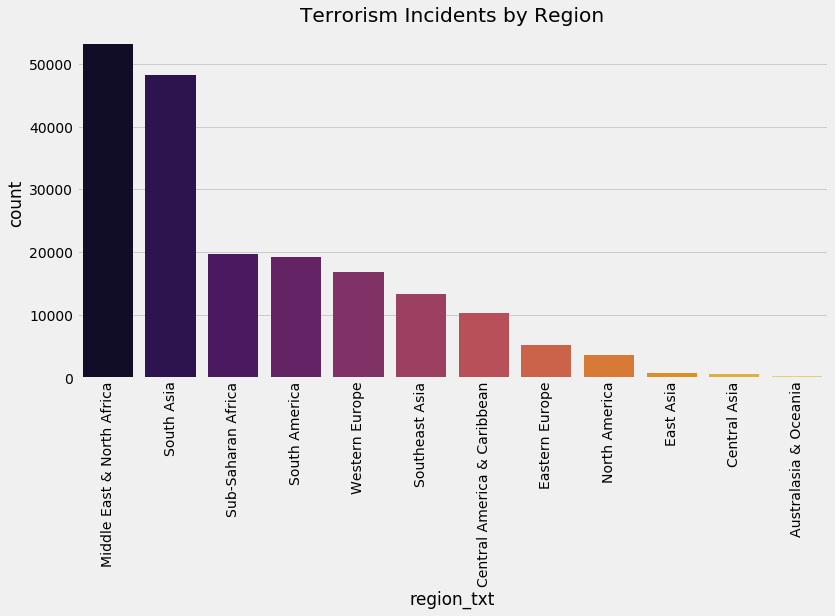

In [112]:
# GRAPH: Identifying which REGIONS have the highest terrorism incidents

plt.subplots(figsize=(12,6))
sns.countplot('region_txt', data=df, palette ='inferno', order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Incidents by Region')
plt.show()

In [113]:
# ===================== Incident Targets - ALL terrorist groups and ALL world regions ===================== 

target = df.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - WHOLE WORLD')
target


TERRORISM TARGETS - WHOLE WORLD


,incident_count
targtype1_txt,
Private Citizens & Property,46283
Military,29978
Police,26023
Government (General),22274
Business,21277
Transportation,6929
Unknown,6449
Utilities,6158
Religious Figures/Institutions,4693


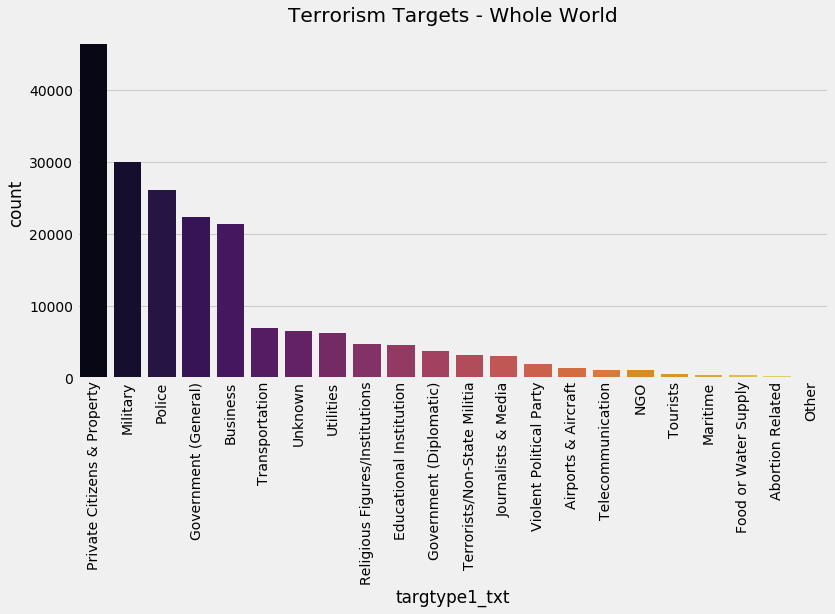

In [114]:
# GRAPH: Incident Targets - ALL terrorist groups and ALL world regions

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=df, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - Whole World')
plt.show()

In [115]:
# ===================== Incident Targets - Middle East & North Africa, all Terrorist Groups ===================== 

regionString = 'Middle East & North Africa'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Middle East & North Africa


,incident_count
targtype1_txt,
Private Citizens & Property,16182
Military,9866
Police,7128
Government (General),4411
Business,4323
Unknown,2353
Terrorists/Non-State Militia,1777
Religious Figures/Institutions,1316
Transportation,1212


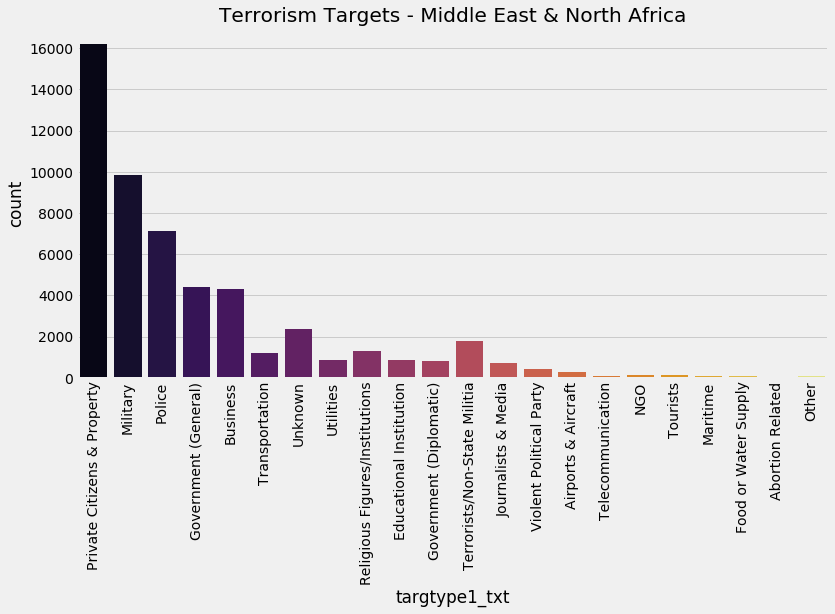

In [116]:
# GRAPH: Incident Targets - Middle East & North Africa, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [117]:
# ===================== Incident Targets - South Asia, all Terrorist Groups ===================== 

regionString = 'South Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - South Asia


,incident_count
targtype1_txt,
Private Citizens & Property,11099
Police,9412
Military,6289
Government (General),5809
Business,3297
Unknown,2645
Transportation,2162
Educational Institution,1852
Religious Figures/Institutions,1191


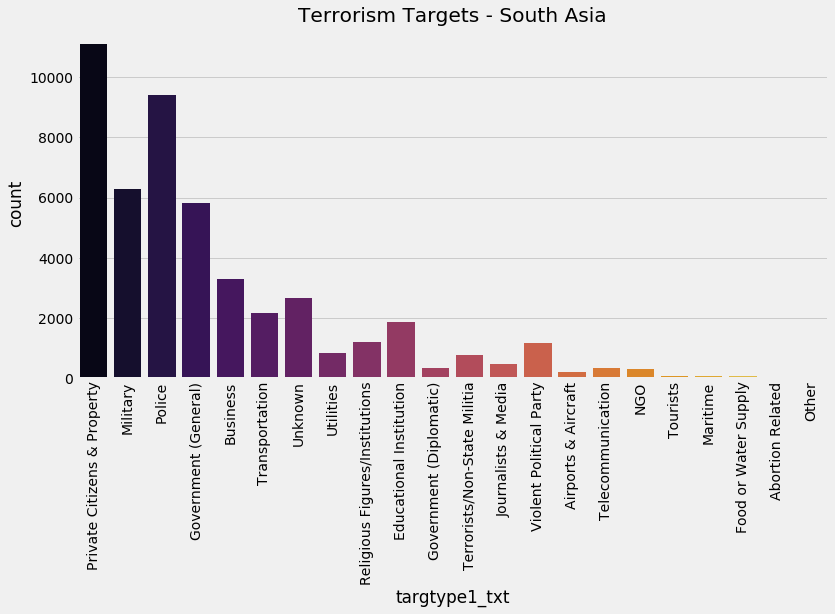

In [118]:
# GRAPH: Incident Targets - South Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [119]:
# ===================== Incident Targets - Sub-Saharan Africa, all Terrorist Groups ===================== 

regionString = 'Sub-Saharan Africa'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Sub-Saharan Africa


,incident_count
targtype1_txt,
Private Citizens & Property,6584
Military,3552
Government (General),2304
Police,1651
Business,1325
Government (Diplomatic),705
Transportation,600
Religious Figures/Institutions,599
Utilities,476


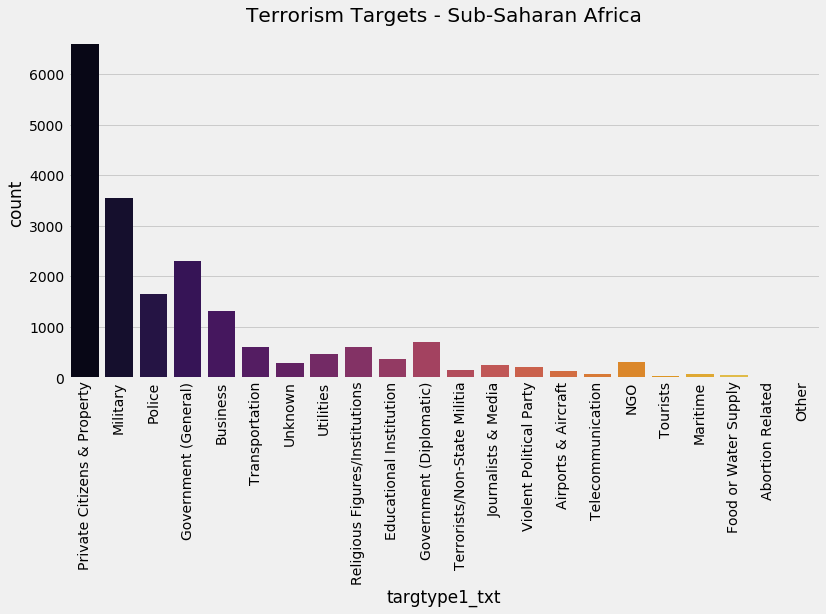

In [120]:
# GRAPH: Incident Targets - Sub-Saharan Africa, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [121]:
# ===================== Incident Targets - South America, all Terrorist Groups ===================== 

regionString = 'South America'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - South America


,incident_count
targtype1_txt,
Business,3531
Private Citizens & Property,3222
Government (General),2874
Police,2294
Utilities,1963
Military,1823
Transportation,1099
Journalists & Media,588
Government (Diplomatic),391


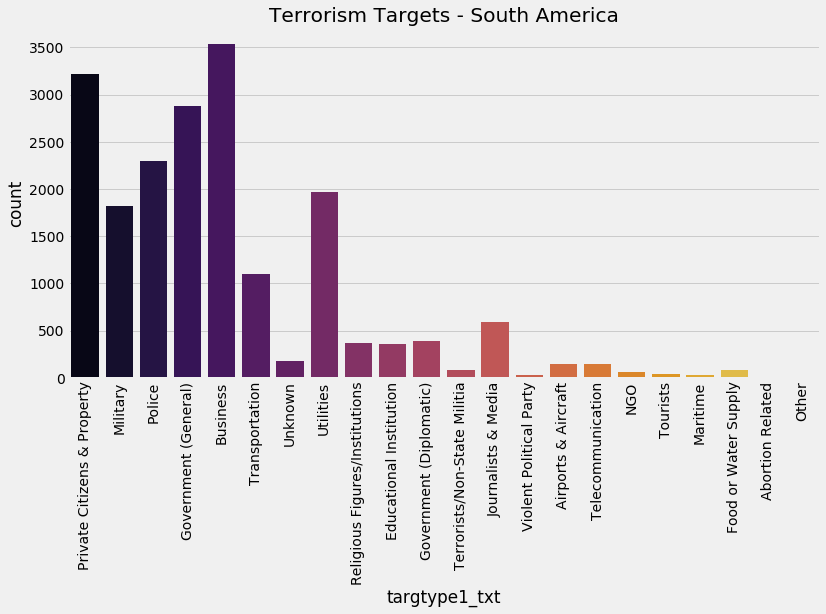

In [122]:
# GRAPH: Incident Targets - South America, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [123]:
# ===================== Incident Targets - Western Europe, all Terrorist Groups ===================== 

regionString = 'Western Europe'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Western Europe


,incident_count
targtype1_txt,
Business,4231
Private Citizens & Property,3439
Government (General),2171
Police,2161
Military,1384
Government (Diplomatic),681
Transportation,454
Unknown,386
Religious Figures/Institutions,333


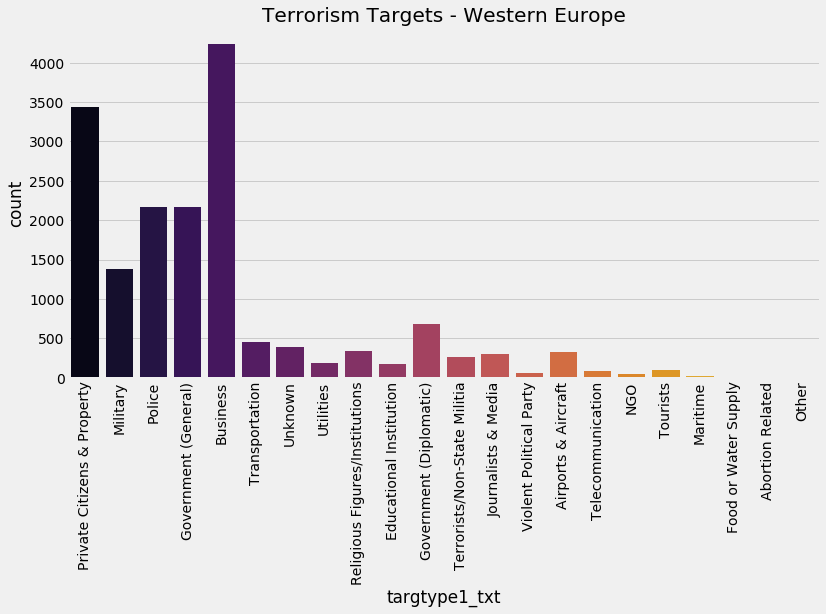

In [124]:
# GRAPH: Incident Targets - Western Europe, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [125]:
# ===================== Incident Targets - Southeast Asia, all Terrorist Groups ===================== 

regionString = 'Southeast Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Southeast Asia


,incident_count
targtype1_txt,
Private Citizens & Property,2650
Military,2501
Government (General),2145
Business,1811
Police,1454
Transportation,470
Educational Institution,421
Utilities,401
Religious Figures/Institutions,357


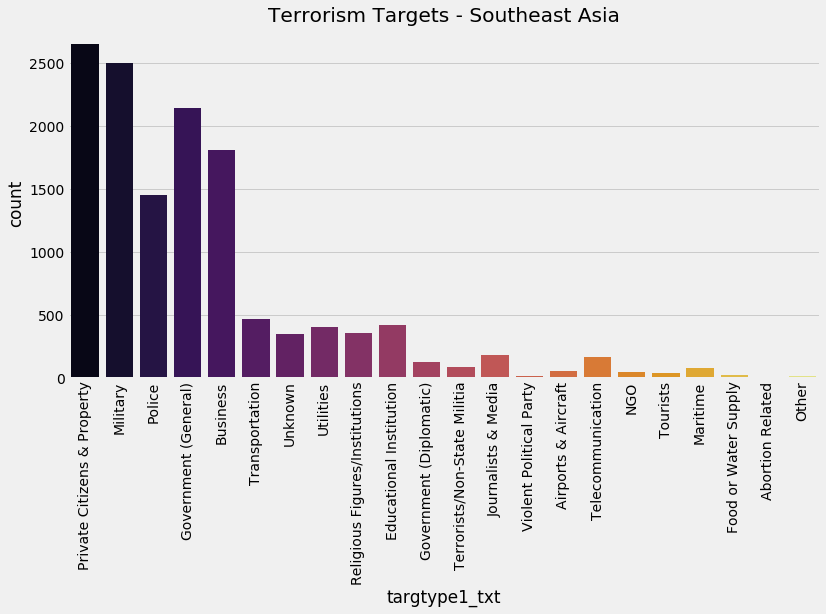

In [126]:
# GRAPH: Incident Targets - Southeast Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [129]:
# ===================== Incident Targets - Central America & Caribbean, all Terrorist Groups ===================== 

regionString = 'Central America & Caribbean'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Central America & Caribbean


,incident_count
targtype1_txt,
Military,3065
Private Citizens & Property,1503
Utilities,1227
Business,1193
Government (General),1114
Police,590
Transportation,406
Journalists & Media,274
Government (Diplomatic),220


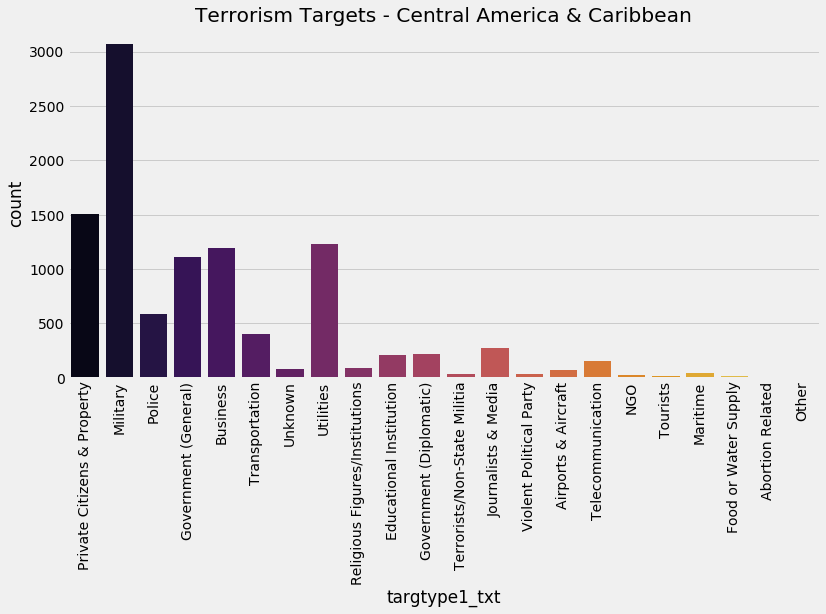

In [130]:
# GRAPH: Incident Targets - Central America & Caribbean, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [131]:
# ===================== Incident Targets - Eastern Europe, all Terrorist Groups ===================== 

regionString = 'Eastern Europe'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Eastern Europe


,incident_count
targtype1_txt,
Military,1139
Private Citizens & Property,888
Police,884
Government (General),704
Business,437
Transportation,295
Religious Figures/Institutions,182
Government (Diplomatic),138
Journalists & Media,138


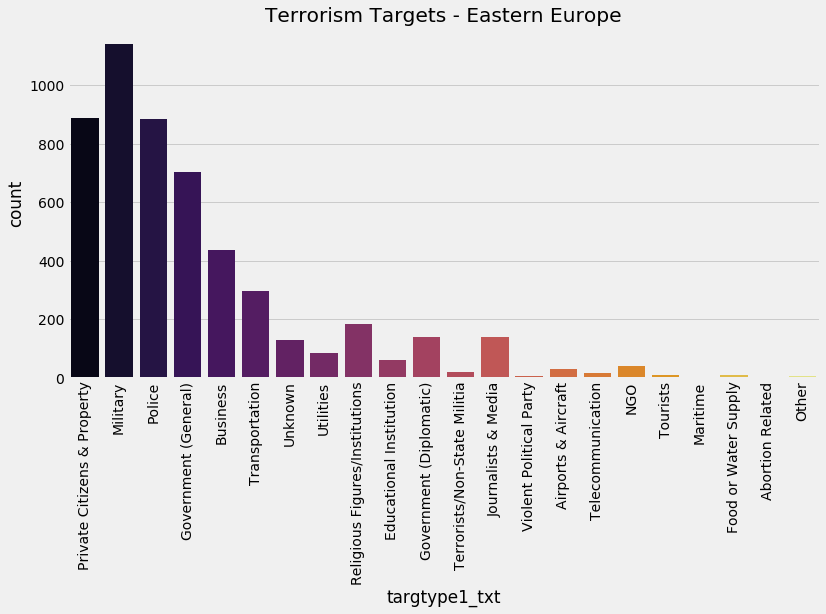

In [132]:
# GRAPH: Incident Targets - Eastern Europe, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [133]:
# ===================== Incident Targets - North America, all Terrorist Groups =====================

regionString = 'North America'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - North America


,incident_count
targtype1_txt,
Business,927
Private Citizens & Property,498
Government (General),433
Abortion Related,260
Police,240
Military,212
Religious Figures/Institutions,192
Educational Institution,184
Government (Diplomatic),184


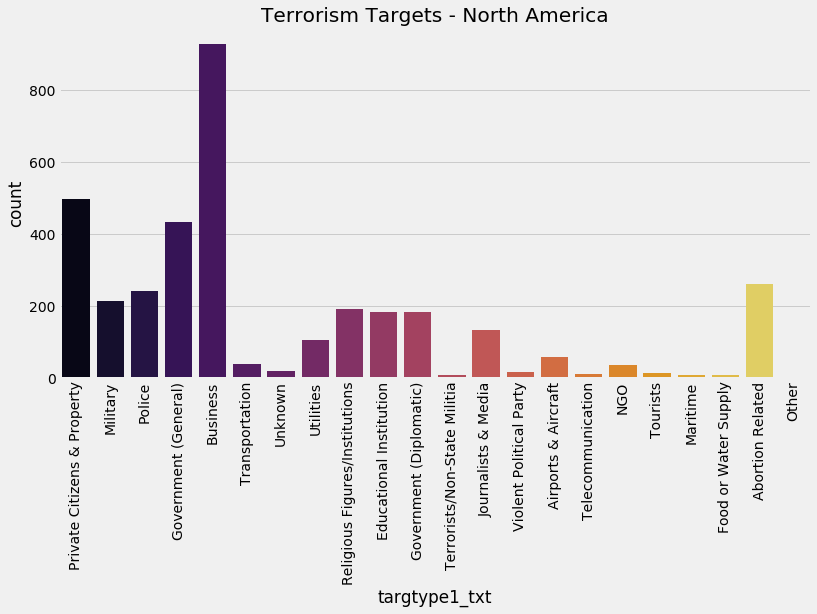

In [134]:
# GRAPH: Incident Targets - North America, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [136]:
# ===================== Incident Targets - East Asia, all Terrorist Groups ====================

regionString = 'East Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - East Asia


,incident_count
targtype1_txt,
Transportation,148
Government (General),129
Business,102
Private Citizens & Property,100
Police,98
Airports & Aircraft,59
Military,41
Government (Diplomatic),35
Religious Figures/Institutions,32


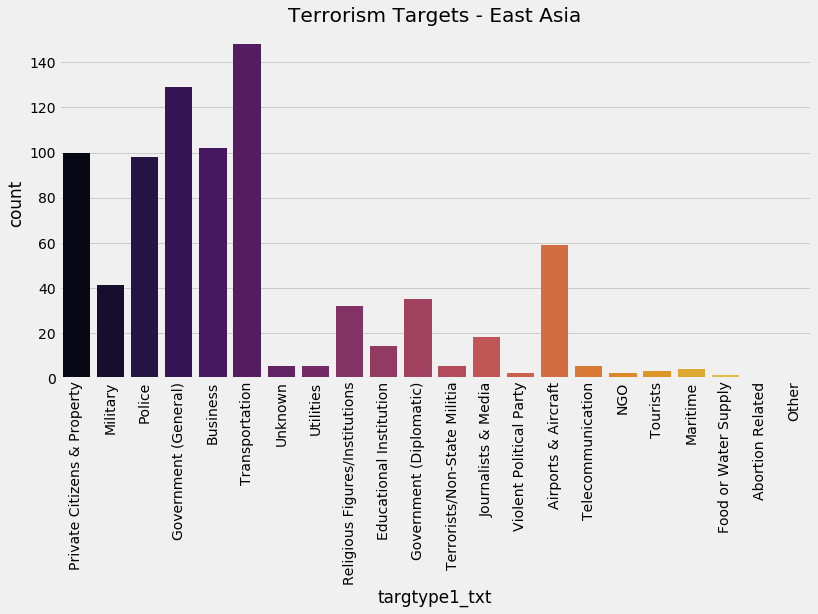

In [137]:
# GRAPH: Incident Targets - East Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [138]:
# ===================== Incident Targets - Central Asia, all Terrorist Groups ====================

regionString = 'Central Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Central Asia


,incident_count
targtype1_txt,
Government (General),128
Military,91
Private Citizens & Property,80
Police,79
Transportation,35
Business,35
Government (Diplomatic),33
Journalists & Media,21
NGO,10


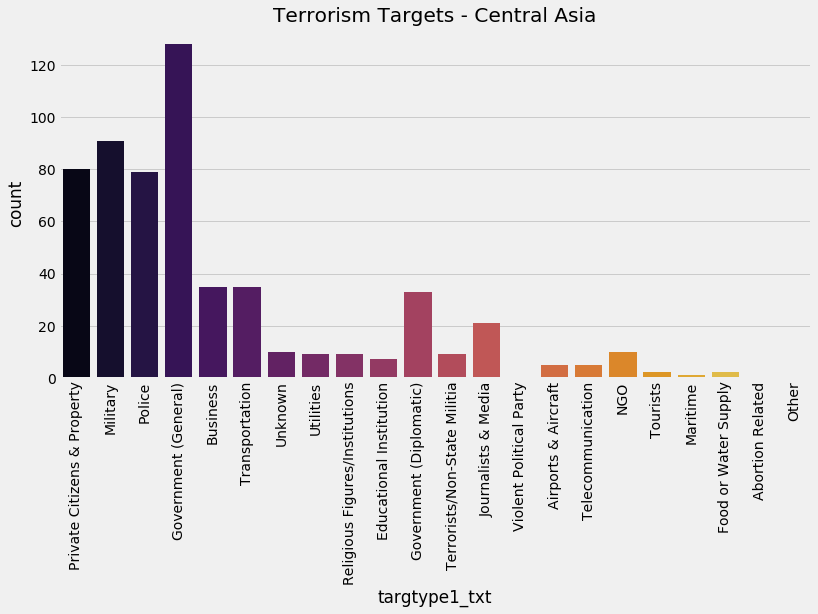

In [139]:
# GRAPH: Incident Targets - Central Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [140]:
# ===================== Incident Targets - Australasia & Oceania, all Terrorist Groups ====================

regionString = 'Australasia & Oceania'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Australasia & Oceania


,incident_count
targtype1_txt,
Business,65
Government (General),52
Private Citizens & Property,38
Police,32
Government (Diplomatic),30
Religious Figures/Institutions,29
Military,15
Transportation,10
Educational Institution,8


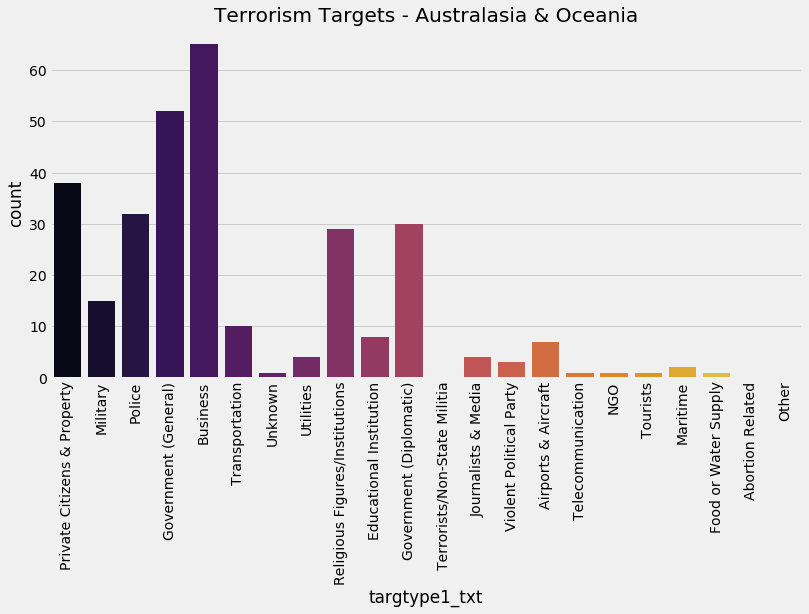

In [141]:
# GRAPH: Incident Targets - Australasia & Oceania, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()